In [1]:
# for data tables and analysis
import pandas as pd
# for charting
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
#for Treemap
import squarify

sns.set()
%matplotlib inline
# plot a size that is easy to read
matplotlib.rcParams['figure.figsize'] = (16.0,9.0)
style.use('seaborn')

In [2]:
# read the excel file to get data
mysheetname = 'data'
df = pd.read_excel('data.xlsx', sheet_name= mysheetname)
df

,P&L Label,Amount
0,COR - Direct,33260.50
1,Customer Success (COR) Payroll,127663.90
2,Sales Payroll,291654.09
3,Marketing Payroll,84550.83
4,G&A Payroll,160174.56
5,Product Payroll,137638.41
6,Engineering Payroll,229355.49
7,Travel expenses,14306.11
8,Legal and Accounting,52466.96
9,Outside Services,77173.46


In [3]:
# Create a new column in data frame for our treemap label. Sort by largest expense item
df = df.sort_values(by='Amount',ascending = False)
# Find percentage of total expenses, create column
df['Perc of TotalExp'] = round((df['Amount'] / sum(df['Amount']))*100,1)
# Find percentage of total revenue, create column
# GAAP Revenue (not ARR or subscription)
tot_rev = 912160
df['Perc of TotalRev'] = round((df['Amount'] / tot_rev)*100,1)
# Create new column for labels for treemap which are python strings
df['Chart Label'] = df['P&L Label'] + " (" + df['Perc of TotalRev'].astype('str') + "%)"
df.reset_index(inplace=True, drop=True)
df

,P&L Label,Amount,Perc of TotalExp,Perc of TotalRev,Chart Label
0,Sales Payroll,291654.09,20.4,32.0,Sales Payroll (32.0%)
1,Engineering Payroll,229355.49,16.1,25.1,Engineering Payroll (25.1%)
2,G&A Payroll,160174.56,11.2,17.6,G&A Payroll (17.6%)
3,Product Payroll,137638.41,9.6,15.1,Product Payroll (15.1%)
4,Customer Success (COR) Payroll,127663.90,8.9,14.0,Customer Success (COR) Payroll (14.0%)
5,Sales & Marketing Expenses,94161.34,6.6,10.3,Sales & Marketing Expenses (10.3%)
6,Marketing Payroll,84550.83,5.9,9.3,Marketing Payroll (9.3%)
7,Outside Services,77173.46,5.4,8.5,Outside Services (8.5%)
8,Facility Cost,75241.53,5.3,8.2,Facility Cost (8.2%)
9,Legal and Accounting,52466.96,3.7,5.8,Legal and Accounting (5.8%)


Payroll is the largest category. What is the total payroll as a % of total rev?

In [4]:
# create another data table with just the payroll info
df_payroll = df[df['P&L Label'].str.contains('Payroll')].copy()
df_payroll.reset_index(inplace=True,drop=True)
# create a column for % of total payroll
# Find percentage of total expense, create column
df_payroll['% total P'] = round((df_payroll['Amount'] / sum(df_payroll['Amount']))*100,1)

# Create new column for labels for treemap which are python strings
df_payroll['Payroll Label'] = df_payroll['P&L Label'].apply(lambda x: x[:-8]) + \
                            " (" + df_payroll['Perc of TotalRev'].astype('str') + "%)"
df_payroll.drop('Chart Label',axis = 1, inplace=True)
df_payroll

,P&L Label,Amount,Perc of TotalExp,Perc of TotalRev,% total P,Payroll Label
0,Sales Payroll,291654.09,20.4,32.0,28.3,Sales (32.0%)
1,Engineering Payroll,229355.49,16.1,25.1,22.2,Engineering (25.1%)
2,G&A Payroll,160174.56,11.2,17.6,15.5,G&A (17.6%)
3,Product Payroll,137638.41,9.6,15.1,13.3,Product (15.1%)
4,Customer Success (COR) Payroll,127663.90,8.9,14.0,12.4,Customer Success (COR) (14.0%)
5,Marketing Payroll,84550.83,5.9,9.3,8.2,Marketing (9.3%)


In [5]:
# The answer to total payroll as % of total expense:
total_payroll_as_perc_of_tot = round((sum(df_payroll['Amount'])/sum(df['Amount']))*100,1)
total_payroll_as_perc_of_tot

72.2

In [6]:
# total payroll as % of Gaap Rev
sum(df_payroll['Perc of TotalRev'])

113.1

In [7]:
# total expenses as % of Gaap Revenue
int(sum(df['Perc of TotalRev']))

156

The level of spending is actually not that unusual for a growing SaaS company which is investing in it sales team. 

CREATE THE CHARTS FROM THE 2 SETS OF DATA

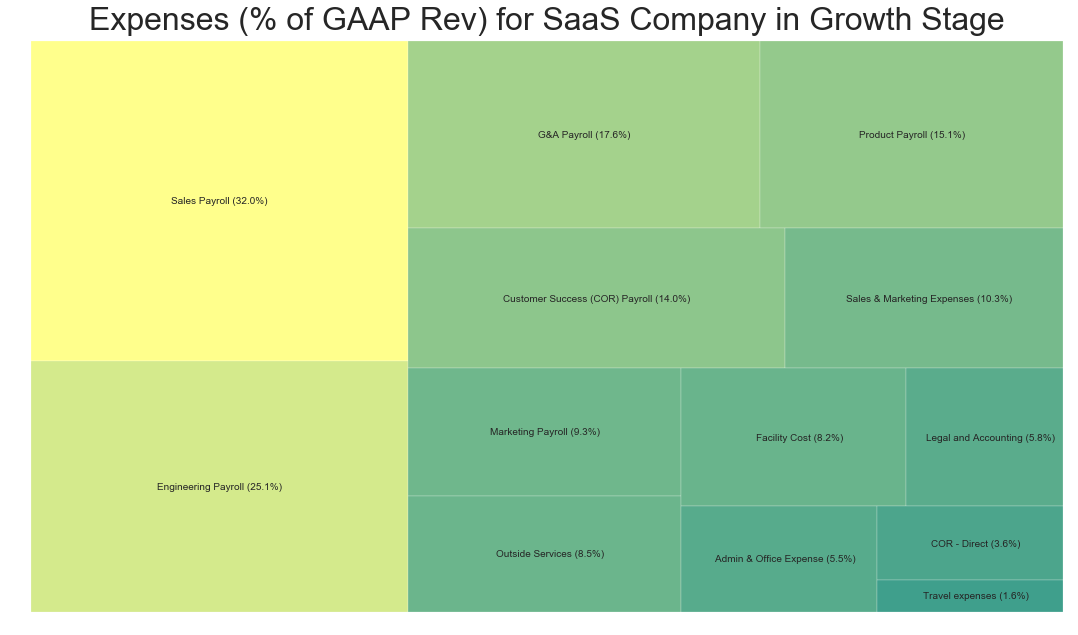

In [8]:
# Chart of All expenses
fig, ax = plt.subplots()
# colormap
cmap = matplotlib.cm.summer
# max and min values
max_val = max(df['Amount'])
min_val = min(df['Amount'])
# creating colors for each tile
norm = matplotlib.colors.Normalize(vmax = max_val, vmin = min_val)
colors = [cmap(norm(value)) for value in df['Amount']]
# create the chart with .plot
squarify.plot(sizes=df['Amount'],label=df['Chart Label'],alpha = 0.75, color = colors)
# Remove axis line
plt.axis('off')
# invert the y-axis so largest percentages are at the upper left
plt.gca().invert_yaxis()
# Title and positioning
plt.title('Expenses (% of GAAP Rev) for SaaS Company in Growth Stage',fontsize = 32)
title_pos = ax.title
title_pos.set_position([.5, 1.01])
#set figure size and save
fig.set_size_inches(18.5, 10.5)
fig.savefig('tree1.jpg', dpi=100)


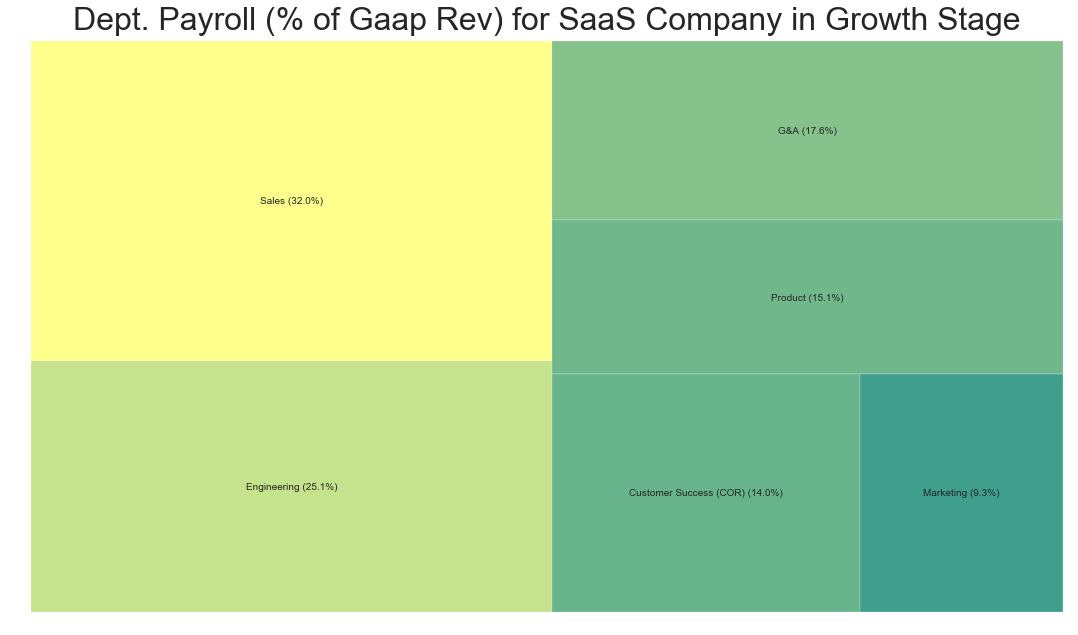

In [10]:
# Create Chart for Payroll categories only
# Chart of All expenses
fig2, ax2 = plt.subplots()
# colormap
cmap = matplotlib.cm.summer
# max and min values
max_val = max(df_payroll['Amount'])
min_val = min(df_payroll['Amount'])
# creating colors for each tile
norm = matplotlib.colors.Normalize(vmax = max_val, vmin = min_val)
colors = [cmap(norm(value)) for value in df_payroll['Amount']]
# create the chart with .plot
squarify.plot(sizes=df_payroll['Amount'],label=df_payroll['Payroll Label'],alpha = 0.75, color = colors)
# Remove axis line
plt.axis('off')
# invert the y-axis so largest percentages are at the upper left
plt.gca().invert_yaxis()
# Title and positioning
plt.title('Dept. Payroll (% of Gaap Rev) for SaaS Company in Growth Stage',fontsize = 32)
title_pos = ax2.title
title_pos.set_position([.5, 1.01])
#set figure size and save
fig2.set_size_inches(18.5, 10.5)
fig2.savefig('tree2.jpg', dpi=100)